In [49]:
import numpy as np
import pandas as pd

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Encoding
from sklearn.preprocessing import LabelEncoder

# Modelling
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Cross-Validation
from sklearn.model_selection import StratifiedKFold

У меня не получилось добавить данные на гитхаб, поэтому вот ссылка на них на кэгле: Tabular Playground Series - Feb 2022, 
https://www.kaggle.com/competitions/tabular-playground-series-feb-2022/data

In [50]:
train = pd.read_csv('D:\\music\\train.csv\\train.csv', index_col=0) 
test = pd.read_csv('D:\\music\\test.csv\\test.csv', index_col=0)
sub = pd.read_csv('D:\\music\\sample_submission.csv\\sample_submission.csv')

Посмотрим, что за данные попали на анализ(data exploration)

In [7]:
train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
row_id,,,,,,,,,,,,,,,,,,,,,
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


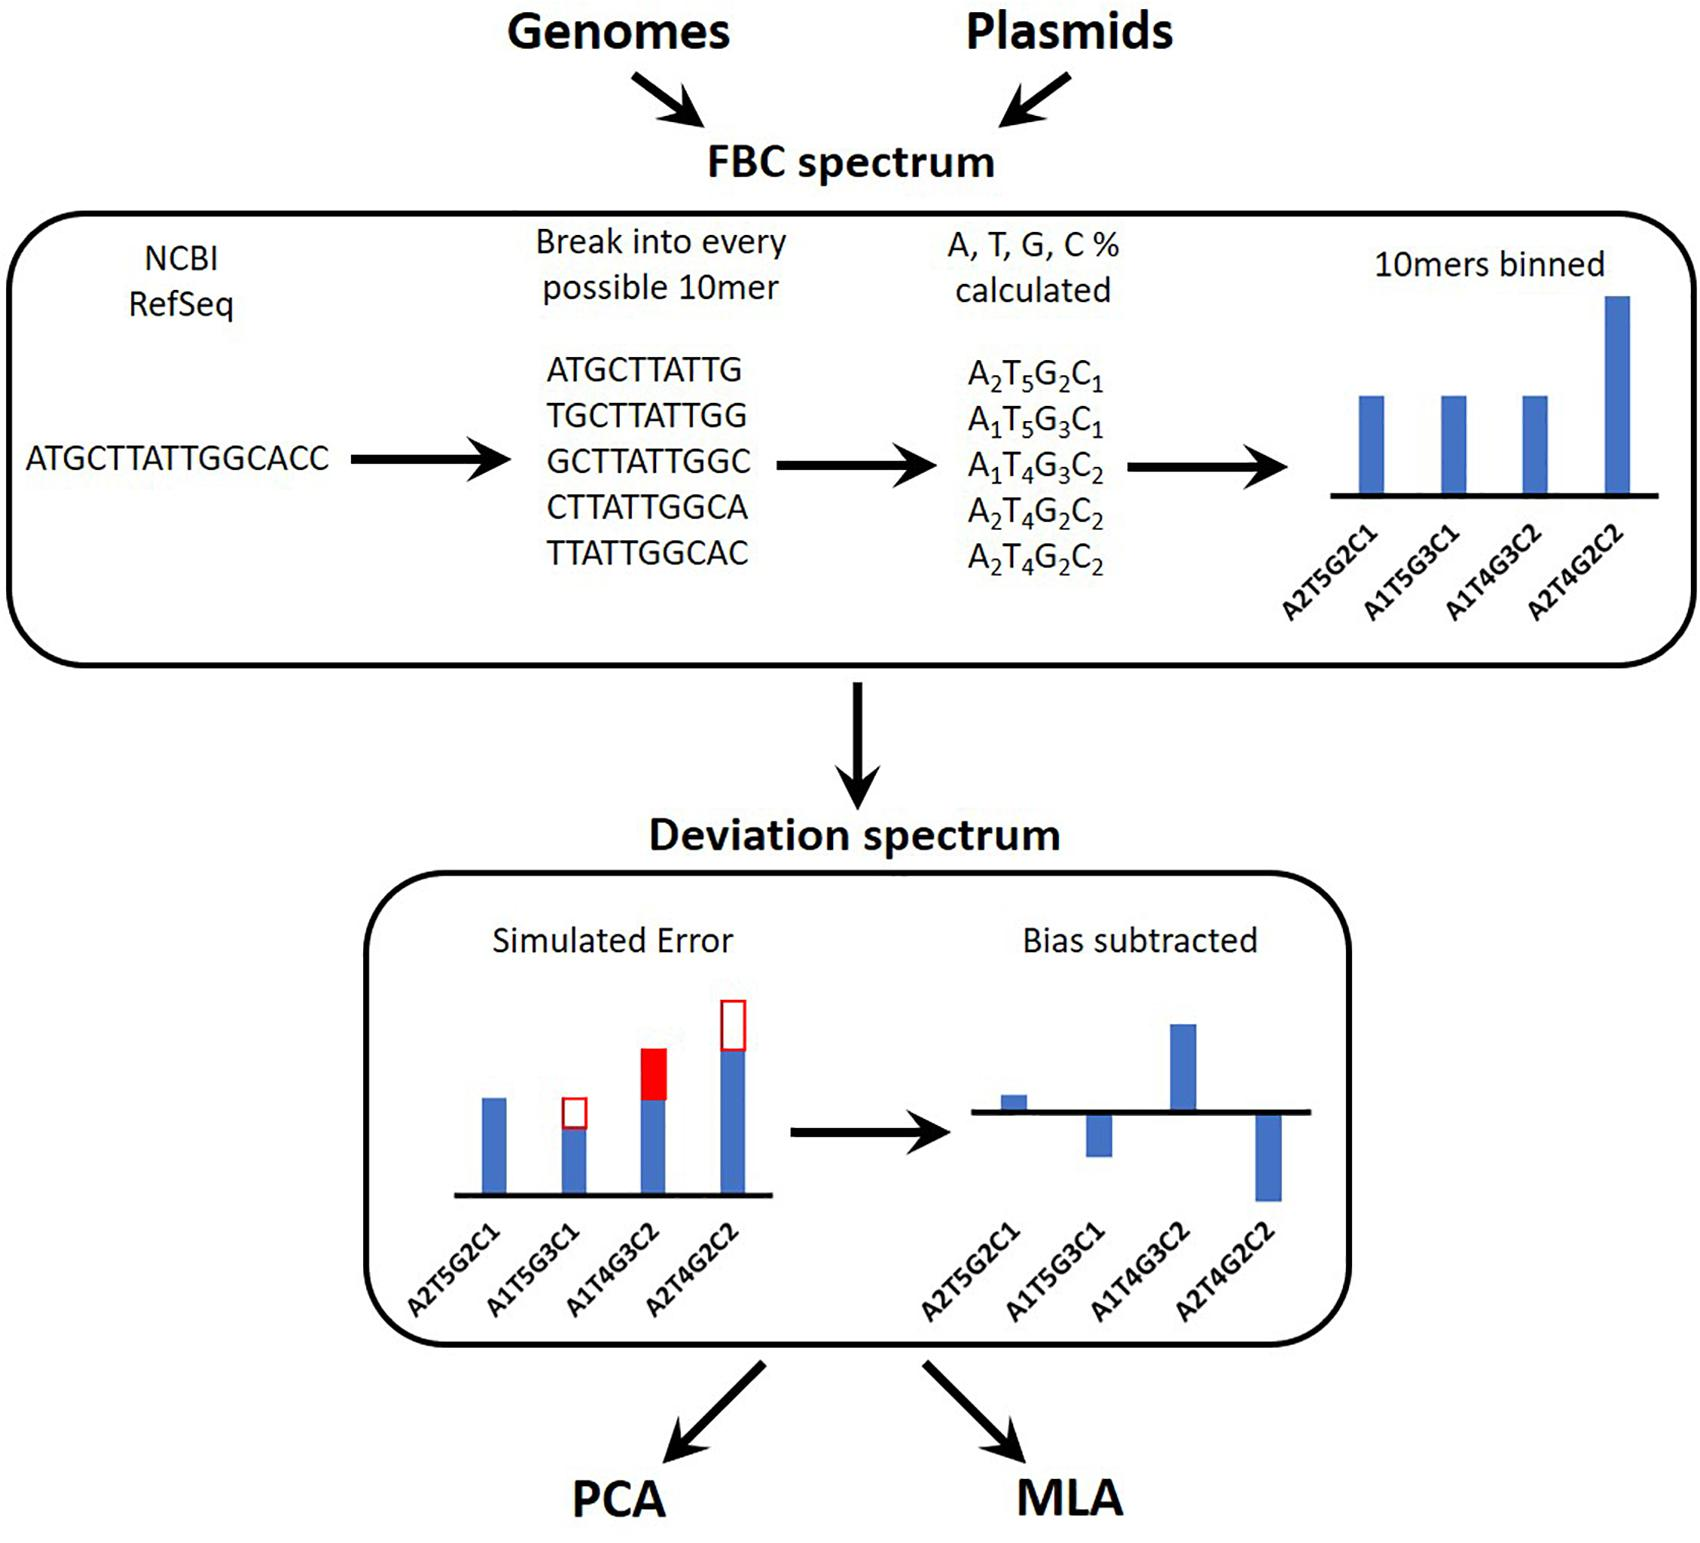

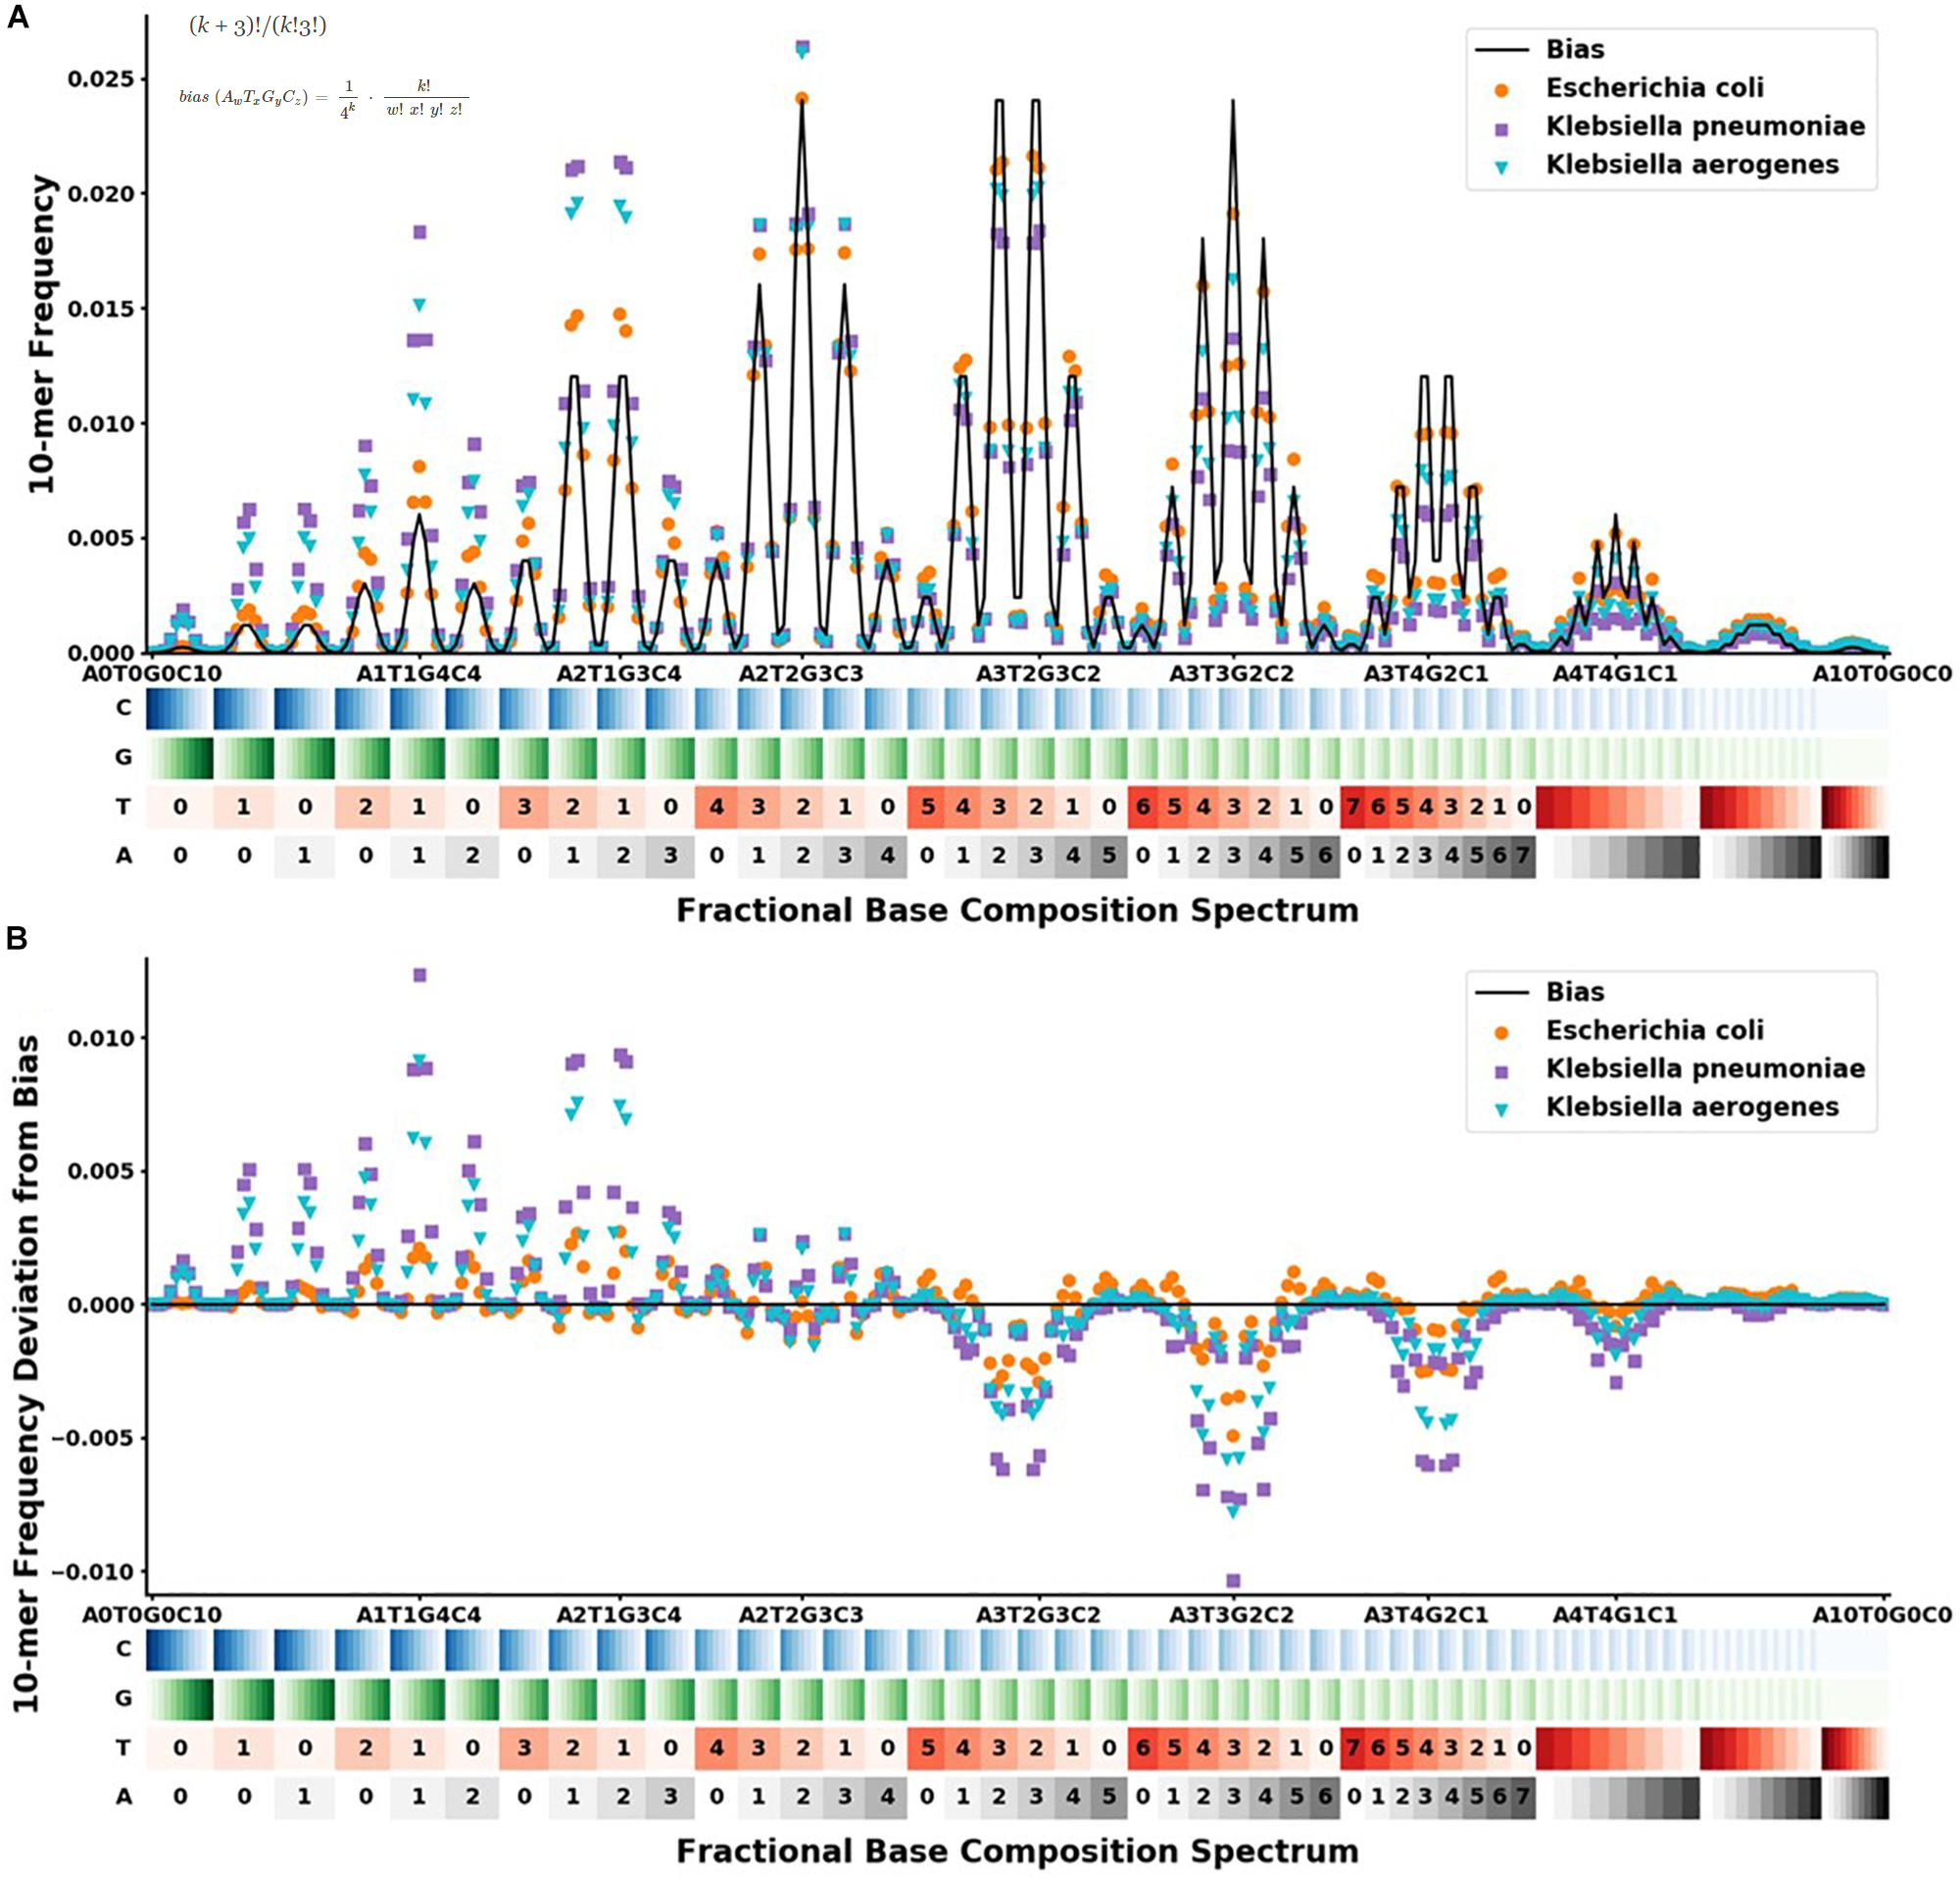

На первой картинке видно как собирали данные и что это за буквы стоят в features(взяли ДНК, порезали на куски по 10 оснований обе цепи, сняли Рамановский спектр, получили с него A(w)T(x)G(y)C(z), посчитали количество частоту с которой встречается каждая комбинация). Вторая картинка показывает, что вообще за числа лежат в таблице, почему они маленькие, их сумма по каждой строчке не 1, и почему они бывают отрицательные. Вообще по сути это должна была быть частота с которой встречается каждый кусок из 10 оснований в ДНК конкретной бактерии. Но авторы научной статьи, на основе которой была построена эта задача, утверждают, что если вычесть спектр абсолютно случайной ДНК(в которой каждая последовательность из 10 оснований встречается по 1 разу) и вычесть его из значений для реальных ДНК, определять видовую принадлежность бактерии по этим данным будет легче(они станут более видоспецифичными).

In [8]:
train.describe()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05
mean,6.421457e-07,-0.000003,-0.000014,-0.000010,0.000005,0.000025,0.000014,-0.000009,-0.000028,-0.000008,...,0.000135,0.000348,0.000253,0.000464,0.000581,0.000379,0.000062,8.982134e-05,1.170014e-04,2.215407e-07
std,8.654927e-05,0.000132,0.000287,0.000436,0.000683,0.000869,0.000775,0.000441,0.000107,0.000083,...,0.000711,0.001117,0.000914,0.001238,0.001528,0.001182,0.000466,5.475606e-04,6.788277e-04,2.050081e-05
min,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
25%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
50%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000237,-0.000199,-0.000114,-0.000043,-0.000010,...,0.000014,0.000064,0.000047,0.000124,0.000114,0.000043,-0.000010,4.632568e-07,4.632568e-07,-9.536743e-07
75%,-9.536743e-07,-0.000003,-0.000013,-0.000004,-0.000011,0.000003,-0.000030,0.000004,-0.000028,-0.000010,...,0.000111,0.000463,0.000297,0.000684,0.000774,0.000365,0.000030,6.046326e-05,6.946326e-05,-9.536743e-07
max,9.999046e-03,0.009990,0.009957,0.009886,0.019800,0.019760,0.019800,0.009886,0.009957,0.009990,...,0.019957,0.019914,0.019957,0.019914,0.019914,0.019957,0.009990,9.990463e-03,1.999046e-02,9.990463e-04


In [9]:
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)
print('Submission data shape:', sub.shape)


Train data shape: (200000, 287)
Test data shape: (100000, 286)
Test data shape: (100000, 2)


In [12]:
missing_values_train = train.isna().any().sum()
missing_values_test = test.isna().any().sum()

print('Missing values in train data: {0}'.format(missing_values_train))
print('Missing values in test data: {0}'.format(missing_values_test))

Missing values in train data: 0
Missing values in test data: 0


In [25]:
duplicates_train = train.duplicated().sum()
duplicates_test = test.duplicated().sum()

print('Duplicates in train data: {0}'.format(duplicates_train))
print('Duplicates in test data: {0}'.format(duplicates_test))

Duplicates in train data: 76007
Duplicates in test data: 26779


Ощутимое количество повторов в тренировочных данных, в описании к задаче также предупреждали об ощутимом количестве ошибок в тренировочных данных, непонятно что делать с дубликатами. Поэтому дальше рассмотрены просто два варианта: с повторами и без.

In [51]:
train_with_duplicates = train.copy()
train.drop_duplicates(keep='first', inplace=True)
duplicates_train = train.duplicated().sum()

print('Train data shape:', train.shape)
print('Duplicates in train data: {0}'.format(duplicates_train))

Train data shape: (123993, 287)
Duplicates in train data: 0


Посмотрим на числовые признаки:

In [27]:
numerical_features = train.columns[:-1]
print("Numerical Columns: \n{0}".format(list(numerical_features)))

Numerical Columns: 
['A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6', 'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2', 'A0T0G9C1', 'A0T0G10C0', 'A0T1G0C9', 'A0T1G1C8', 'A0T1G2C7', 'A0T1G3C6', 'A0T1G4C5', 'A0T1G5C4', 'A0T1G6C3', 'A0T1G7C2', 'A0T1G8C1', 'A0T1G9C0', 'A0T2G0C8', 'A0T2G1C7', 'A0T2G2C6', 'A0T2G3C5', 'A0T2G4C4', 'A0T2G5C3', 'A0T2G6C2', 'A0T2G7C1', 'A0T2G8C0', 'A0T3G0C7', 'A0T3G1C6', 'A0T3G2C5', 'A0T3G3C4', 'A0T3G4C3', 'A0T3G5C2', 'A0T3G6C1', 'A0T3G7C0', 'A0T4G0C6', 'A0T4G1C5', 'A0T4G2C4', 'A0T4G3C3', 'A0T4G4C2', 'A0T4G5C1', 'A0T4G6C0', 'A0T5G0C5', 'A0T5G1C4', 'A0T5G2C3', 'A0T5G3C2', 'A0T5G4C1', 'A0T5G5C0', 'A0T6G0C4', 'A0T6G1C3', 'A0T6G2C2', 'A0T6G3C1', 'A0T6G4C0', 'A0T7G0C3', 'A0T7G1C2', 'A0T7G2C1', 'A0T7G3C0', 'A0T8G0C2', 'A0T8G1C1', 'A0T8G2C0', 'A0T9G0C1', 'A0T9G1C0', 'A0T10G0C0', 'A1T0G0C9', 'A1T0G1C8', 'A1T0G2C7', 'A1T0G3C6', 'A1T0G4C5', 'A1T0G5C4', 'A1T0G6C3', 'A1T0G7C2', 'A1T0G8C1', 'A1T0G9C0', 'A1T1G0C8', 'A1T1G1C7', 'A1T1G2C6', 'A1T1G3C5', 'A1T1G4C4', 'A1T

Категориальные признаки:

In [19]:
category_features = train.columns[-1]
print("Category Columns: {0}".format(category_features))

Category Columns: target


Посмотрим на распределение образцов по бактериям(рядов по категориям). Бактерий всего 10 типов, образцов в тренировочном файле 200000.

In [21]:
def plot(train, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xticks(rotation=30, ha='right')
    ax = sns.countplot(x=train['target'], data=train)
    print(pd.Series(train['target'], index=train.index).value_counts().sort_index() / len(train) * 100)

Bacteroides_fragilis        10.098957
Campylobacter_jejuni        10.056213
Enterococcus_hirae           9.978789
Escherichia_coli             9.917495
Escherichia_fergusonii       9.907817
Klebsiella_pneumoniae       10.016694
Salmonella_enterica          9.992500
Staphylococcus_aureus       10.012662
Streptococcus_pneumoniae    10.013469
Streptococcus_pyogenes      10.005404
Name: target, dtype: float64


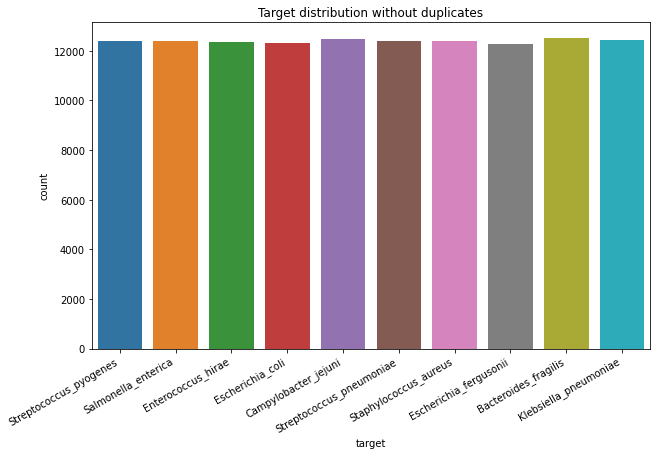

In [25]:
plot(train, "Target distribution without duplicates")

Bacteroides_fragilis        10.0695
Campylobacter_jejuni        10.0315
Enterococcus_hirae           9.9735
Escherichia_coli             9.9790
Escherichia_fergusonii       9.9685
Klebsiella_pneumoniae        9.9235
Salmonella_enterica         10.0150
Staphylococcus_aureus        9.9645
Streptococcus_pneumoniae    10.0370
Streptococcus_pyogenes      10.0380
Name: target, dtype: float64


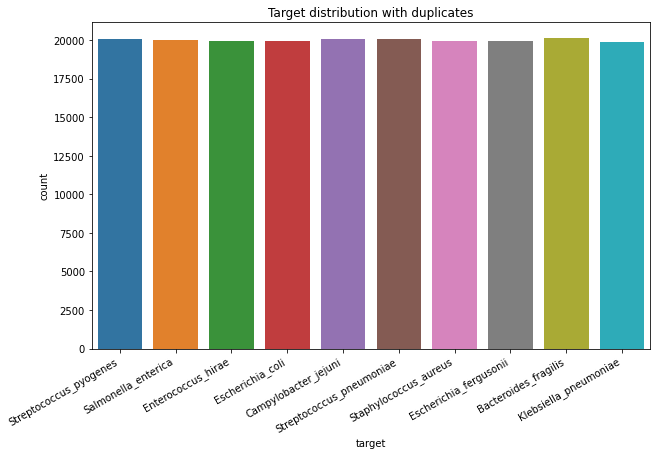

In [24]:
plot(train_with_duplicates, "Target distribution with duplicates")

И там, и там распределение всех образцов по категориям вполне равномерное

In [ ]:
По идее по хитмэпу смотрят на то какие признаки коррелируют между собой, дальше используют это для анализа/выбора модели.
Но я просто его построила. В биологии по нему еще часто смотрят на экспрессию генов.

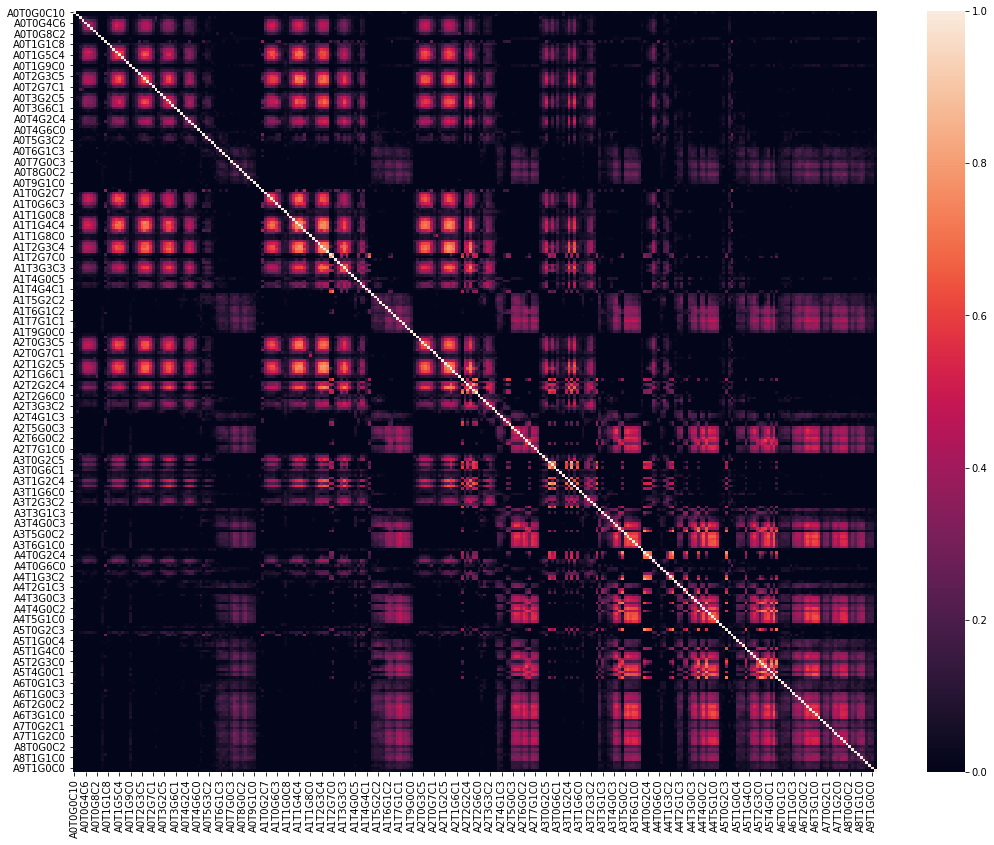

In [34]:
plt.figure(figsize=(18, 14))
correlation = train.corr()
sns.heatmap(correlation, vmin=0)
plt.show()

Построение модели. Задача классификации. Модель случайного дерева(с кросс-валидацией). С оценкой точности(качества) модели

В тренировочной выборке есть ответы - обучение с учителем. Нужно определить к какому из 10 типов относится образец - задача классификации. Взяла модель рандомного леса. 

In [52]:
N_SPLITS = 10
ESTIMATORS = 300


def run_model(train):
    df = train.copy()
    df["target"] = target_encoder.fit_transform(df["target"])

    X = df.drop(["target"], axis=1)
    y = df["target"]

    scores = []
    y_probs = []
    folds = StratifiedKFold(n_splits=N_SPLITS, random_state=1, shuffle=True)
    for fold, (train_id, test_id) in enumerate(folds.split(X, y)):  
        X_train = X.iloc[train_id]
        y_train = y.iloc[train_id]
        X_valid = X.iloc[test_id]
        y_valid = y.iloc[test_id]

        model = ExtraTreesClassifier(n_estimators=ESTIMATORS, random_state=1, n_jobs=-1)
        
        model.fit(X_train, y_train)

        valid_pred = model.predict(X_valid)
        
        valid_score = 0
        valid_score = accuracy_score(y_valid, valid_pred)

        print("Fold:", fold + 1, "Accuracy:", valid_score)
        scores.append(valid_score)
        y_probs.append(model.predict_proba(test))

    print("Mean accuracy score:", np.array(scores).mean())
    return y_probs

На экран выводится точность прогноза для каждого fold. В само значение y_probs сохраняются вероятности того что конкретный образец принадлежит определенному классу(для каждого из 10 fold, для каждого из 100000 тестовых образцов, для каждого из 10 классов.

In [64]:
y_probs = run_model(train)

Fold: 1 Accuracy: 0.9759677419354839
Fold: 2 Accuracy: 0.9768548387096774
Fold: 3 Accuracy: 0.9740322580645161
Fold: 4 Accuracy: 0.9765303653520445
Fold: 5 Accuracy: 0.9774175336720703
Fold: 6 Accuracy: 0.975401242035648
Fold: 7 Accuracy: 0.9741108153883378
Fold: 8 Accuracy: 0.9777401403338979
Fold: 9 Accuracy: 0.9745140737156223
Fold: 10 Accuracy: 0.9736269053955964
Mean accuracy score: 0.9756195914602894


In [53]:
y_probs_with_duplicates = run_model(train_with_duplicates)

Fold: 1 Accuracy: 0.99635
Fold: 2 Accuracy: 0.9966
Fold: 3 Accuracy: 0.9962
Fold: 4 Accuracy: 0.9967
Fold: 5 Accuracy: 0.9963
Fold: 6 Accuracy: 0.9961
Fold: 7 Accuracy: 0.9969
Fold: 8 Accuracy: 0.9956
Fold: 9 Accuracy: 0.99635
Fold: 10 Accuracy: 0.99705
Mean accuracy score: 0.996415


In [65]:
def target_retransform_distribution(y_probs, train):
    y_prob = sum(y_probs) / len(y_probs)
    target_distribution = train['target'].value_counts().sort_index() / len(train) * 100
    y_pred = target_encoder.inverse_transform(np.argmax(y_prob, axis=1))
    print(pd.Series(y_pred, index=test.index).value_counts().sort_index() / len(test) * 100)
    return y_pred

Посмотрим на распределение по классам в тестовой выборке

In [66]:
y_pred = target_retransform_distribution(y_probs, train)

Bacteroides_fragilis        10.051
Campylobacter_jejuni        10.236
Enterococcus_hirae           9.715
Escherichia_coli             8.469
Escherichia_fergusonii      11.002
Klebsiella_pneumoniae       10.210
Salmonella_enterica         10.234
Staphylococcus_aureus        9.919
Streptococcus_pneumoniae    10.068
Streptococcus_pyogenes      10.096
dtype: float64


In [67]:
y_pred_with_duplicates = target_retransform_distribution(y_probs_with_duplicates, train_with_duplicates)

Bacteroides_fragilis        10.048
Campylobacter_jejuni        10.213
Enterococcus_hirae           9.722
Escherichia_coli             8.502
Escherichia_fergusonii      10.977
Klebsiella_pneumoniae       10.197
Salmonella_enterica         10.239
Staphylococcus_aureus        9.930
Streptococcus_pneumoniae    10.079
Streptococcus_pyogenes      10.093
dtype: float64


Проверим тренировочную и тестовую выборку на пересечение, заменим предсказание по тестовой выборке на значение из тренировочной (если оно такое существует с теми же признаками). Чтобы хотя бы в эти моменты гарантировать остсутствие ошибок.

In [68]:
intersection = test.copy()
intersection['copy_index'] = intersection.index
intersection = intersection.merge(train, on=list(test.columns), how="inner")
print("There are {0} rows which are included in both training and test sets.".format(len(intersection)))

There are 486 rows which are included in both training and test sets.


In [69]:
def update_target(data, intersection):
    count = 0
    for index, row in intersection.iterrows():
        if data[int(row['copy_index']) - 200000] != row.target:
            count = count + 1
            data[int(row['copy_index']) - 200000] = row.target

In [70]:
update_target(y_pred, intersection)
update_target(y_pred_with_duplicates, intersection)

Запишем полученные предсказания в csv файлы

In [71]:
def submission(name, y_pred):
    sub["target"] = y_pred
    sub.to_csv(name, index=False)

# Without duplicates
submission("submission.csv", y_pred)

# With duplicates
submission("submission_with_duplicates.csv", y_pred_with_duplicates)